# Deep Learning with Image Processing and Computer Vision

## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

print(f"Tensorflow version: {tf.__version__}")
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds

warnings.filterwarnings("ignore")

Tensorflow version: 2.7.0


## Configurations

In [2]:
class CONFIG:

    img_size = 299
    seed = 42
    AUTOTUNE = tf.data.AUTOTUNE
    learning_rate = 0.01
    batch_size = 32
    epochs = 10
    num_classes = 3
    model = "Xception"
    model_version = 1
    model_name = f"{model}_{model_version}"
    workdir = "workdir"

## Dataset

For the dataset, The `beans` dataset from Tensorflow dataset will be use in this project.

Follow this [link](https://knowyourdata-tfds.withgoogle.com/#tab=STATS&dataset=beans) to know more about the `beans` dataset.

In [3]:
def check_instance(ds):
    assert isinstance(ds, tf.data.Dataset)
    print(ds)

In [4]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    "beans",
    split=["train[:80%]", "train[80%:90%]", "train[90%:]"],
    #     batch_size=CONFIG.batch_size,
    with_info=True,
    as_supervised=True,
    data_dir="../dataset",
)
check_instance(train_ds)
check_instance(val_ds)
check_instance(test_ds)

2022-12-17 12:52:46.220671: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


<PrefetchDataset shapes: ((500, 500, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((500, 500, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((500, 500, 3), ()), types: (tf.uint8, tf.int64)>


2022-12-17 12:52:46.227209: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 12:52:46.227812: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 12:52:46.228884: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-17 12:52:46.229277: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [5]:
metadata

tfds.core.DatasetInfo(
    name='beans',
    full_name='beans/0.1.0',
    description="""
    Beans is a dataset of images of beans taken in the field using smartphone
    cameras. It consists of 3 classes: 2 disease classes and the healthy class.
    Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated
    by experts from the National Crops Resources Research Institute (NaCRRI) in
    Uganda and collected by the Makerere AI research lab.
    """,
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    data_path='../dataset/beans/0.1.0',
    file_format=tfrecord,
    download_size=171.69 MiB,
    dataset_size=171.63 MiB,
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=128, num_shards=1>,
        'train': <SplitInfo num

## EDA image dataset

In [6]:
num_classes = metadata.features["label"].num_classes
print(f"This beans dataset has : {num_classes} classes")

This beans dataset has : 3 classes


In [7]:
images = list()
labels = list()
get_label_name = metadata.features["label"].int2str

for img, label in iter(train_ds):
    images.append(img)
    labels.append(label)

In [8]:
w, h, c = images[0].shape

In [9]:
print(f"Image width: {w}\nImage height: {h}\nImage channel: {c}")

Image width: 500
Image height: 500
Image channel: 3


### inspect more for firsrt fifth teen images

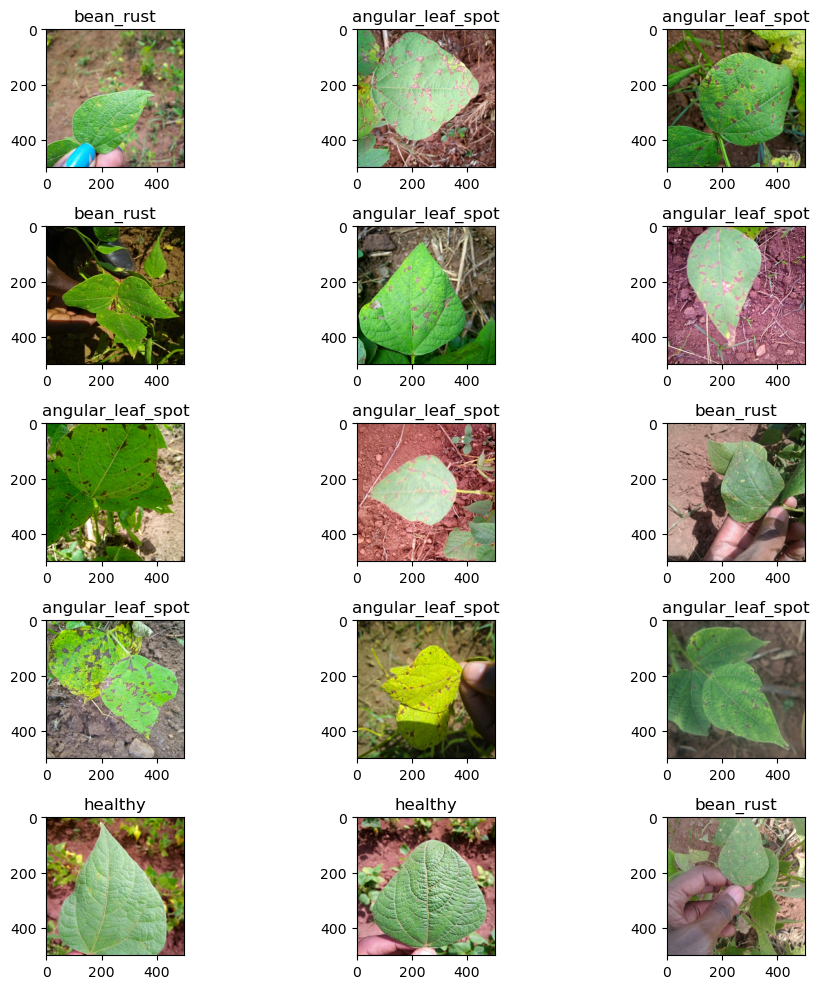

In [10]:
fig = plt.figure(figsize=(10, 10))
cols = 3
rows = 5
for i in range(1, cols * rows + 1):
    fig.add_subplot(rows, cols, i)
    fig.tight_layout()
    _ = plt.imshow(images[i])
    _ = plt.title(get_label_name(labels[i]))
plt.show()

### Plot the images as DataFrame with first 30 images

image  label
0   [[[149, 132, 106], [141, 124, 98], [134, 118, ...      1
1   [[[97, 88, 57], [97, 86, 56], [105, 91, 64], [...      1
2   [[[60, 146, 85], [61, 147, 86], [71, 153, 91],...      0
3   [[[113, 87, 70], [112, 86, 69], [110, 84, 69],...      0
4   [[[13, 15, 14], [15, 17, 16], [13, 15, 14], [6...      1
5   [[[46, 35, 29], [47, 36, 30], [41, 31, 29], [2...      0
6   [[[117, 115, 66], [122, 120, 71], [131, 129, 7...      0
7   [[[18, 107, 0], [13, 102, 0], [18, 104, 3], [1...      0
8   [[[191, 121, 123], [196, 126, 126], [169, 95, ...      0
9   [[[177, 153, 141], [177, 153, 141], [175, 151,...      1
10  [[[144, 139, 117], [137, 132, 112], [135, 128,...      0
11  [[[56, 50, 16], [56, 50, 16], [58, 54, 17], [5...      0
12  [[[94, 103, 74], [84, 93, 66], [85, 89, 66], [...      0
13  [[[255, 225, 85], [211, 181, 49], [181, 149, 3...      2
14  [[[132, 68, 68], [145, 81, 81], [152, 91, 90],...      2
15  [[[134, 124, 115], [155, 145, 135], [175, 167,...      1
16  [[[129, 118, 88], [95, 81, 54], [84, 66, 46], ...      1
17  [[[64, 88, 14], [65, 89, 15], [66, 88, 15], [6...      0
18  [[[93, 109, 83], [96, 112, 86], [97, 115, 91],...      1
19  [[[78, 103, 46], [86, 102, 53], [103, 103, 67]...      2
20  [[[149, 123, 134], [117, 91, 102], [119, 88, 1...      1
21  [[[46, 81, 1], [45, 80, 0], [42, 74, 0], [51, ...      1
22  [[[31, 46, 25], [29, 44, 23], [27, 42, 21], [2...      2
23  [[[35, 25, 13], [35, 25, 13], [27, 17, 7], [31...      1
24  [[[154, 84, 82], [153, 83, 81], [155, 86, 81],...      2
25  [[[46, 35, 5], [40, 29, 1], [36, 26, 1], [34, ...      1
26  [[[134, 164, 172], [134, 164, 172], [135, 165,...      1
27  [[[134, 159, 138], [139, 164, 143], [140, 168,...      1
28  [[[91, 33, 55], [85, 27, 49], [84, 25, 47], [8...      2
29  [[[132, 101, 70], [135, 104, 73], [134, 103, 7...      0
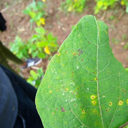
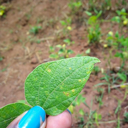
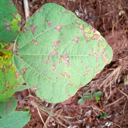
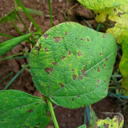
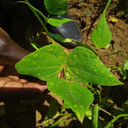
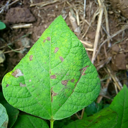
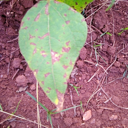
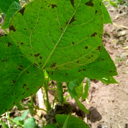
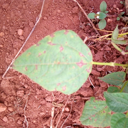
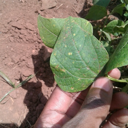
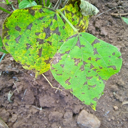
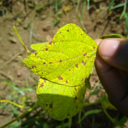
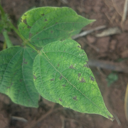
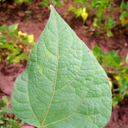
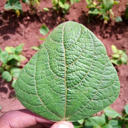
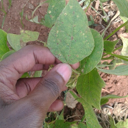
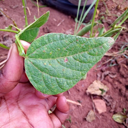
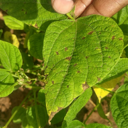
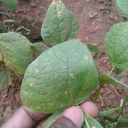
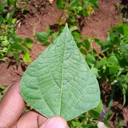
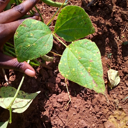
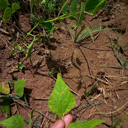
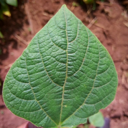
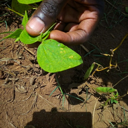
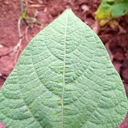
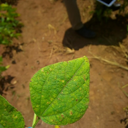
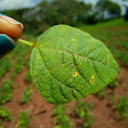
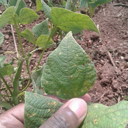
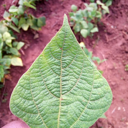
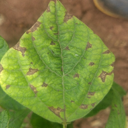

In [11]:
df = tfds.as_dataframe(train_ds.take(30), metadata)
df

## Preprocessing images

In [12]:
resize_and_rescale = keras.Sequential(
    [
        keras.layers.Resizing(CONFIG.img_size, CONFIG.img_size),
        keras.layers.Rescaling(1.0 / 255),
    ]
)

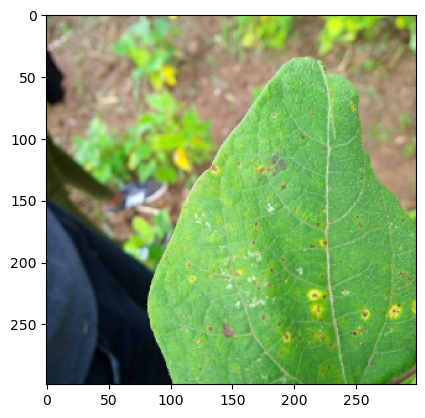

In [13]:
img_after = resize_and_rescale(images[0])
_ = plt.imshow(img_after)

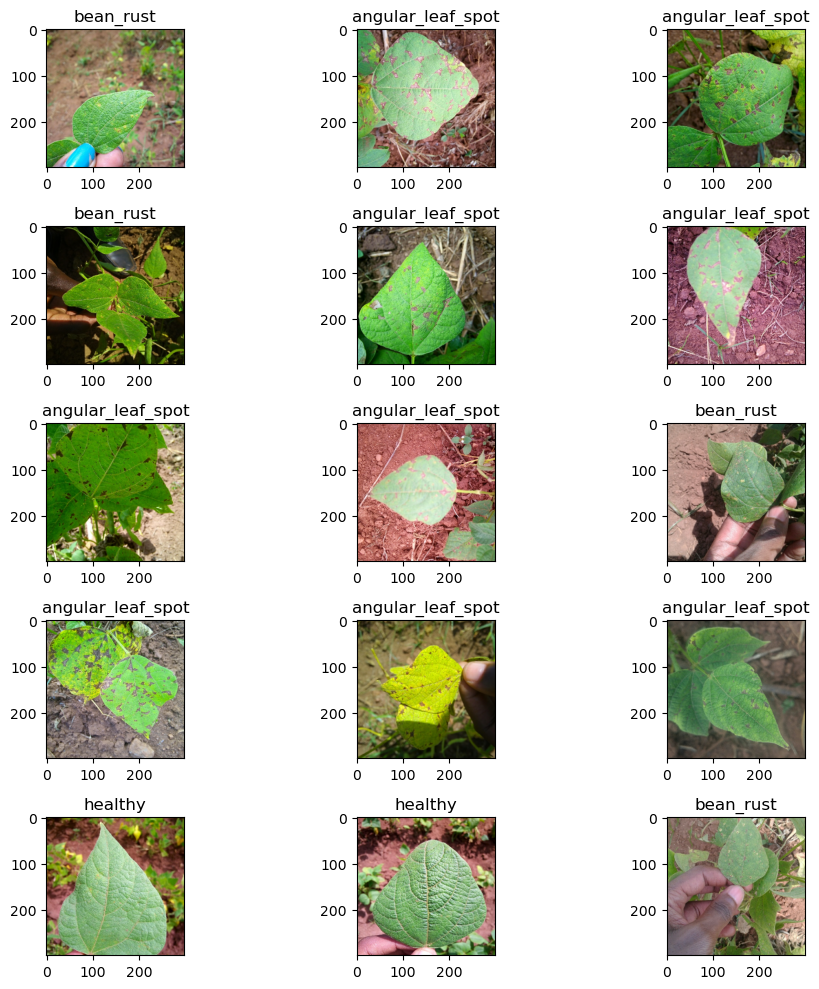

In [14]:
fig = plt.figure(figsize=(10, 10))
cols = 3
rows = 5
for i in range(1, cols * rows + 1):
    fig.add_subplot(rows, cols, i)
    fig.tight_layout()
    img_after = resize_and_rescale(images[i])
    _ = plt.imshow(img_after)
    _ = plt.title(get_label_name(labels[i]))
plt.show()

In [15]:
AUTOTUNE = tf.data.AUTOTUNE


def prepare(ds, shuffle=False):
    # Resize and rescale all datasets.
    ds = ds.map(lambda x, y: (resize_and_rescale(x), y), num_parallel_calls=AUTOTUNE)

    if shuffle:
        ds = ds.shuffle(CONFIG.seed)

    # Batch all datasets
    ds = ds.batch(CONFIG.batch_size)

    # Use buffered prefetching on all datasets.
    return ds.prefetch(buffer_size=AUTOTUNE)

## Model Training - Base model

In [16]:
from tensorflow.keras.applications.xception import Xception

base_model = Xception(weights="imagenet", include_top=False, input_shape=(299, 299, 3))

base_model.trainable = False


inputs = keras.Input(shape=(299, 299, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(3)(vectors)

model = keras.Model(inputs, outputs)

In [17]:
optimizer = keras.optimizers.Adam(learning_rate=CONFIG.learning_rate)

loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [18]:
train_ds = prepare(train_ds, shuffle=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

In [19]:
history = model.fit(train_ds, validation_data=val_ds, epochs=CONFIG.epochs)

Epoch 1/10


2022-12-17 12:53:26.996506: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8100
2022-12-17 12:53:27.638964: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-17 12:53:27.639829: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-17 12:53:27.639869: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-12-17 12:53:27.641036: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-17 12:53:27.641138: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


26/26 [==============================] - 14s 332ms/step - loss: 1.0196 - accuracy: 0.5925 - val_loss: 0.4556 - val_accuracy: 0.7885
Epoch 2/10
26/26 [==============================] - 6s 242ms/step - loss: 0.3501 - accuracy: 0.8622 - val_loss: 0.2633 - val_accuracy: 0.9231
Epoch 3/10
26/26 [==============================] - 6s 242ms/step - loss: 0.2558 - accuracy: 0.9105 - val_loss: 0.2434 - val_accuracy: 0.9231
Epoch 4/10
26/26 [==============================] - 6s 243ms/step - loss: 0.2376 - accuracy: 0.9093 - val_loss: 0.2819 - val_accuracy: 0.8654
Epoch 5/10
26/26 [==============================] - 6s 244ms/step - loss: 0.1971 - accuracy: 0.9335 - val_loss: 0.2339 - val_accuracy: 0.9135
Epoch 6/10
26/26 [==============================] - 6s 244ms/step - loss: 0.1534 - accuracy: 0.9541 - val_loss: 0.2084 - val_accuracy: 0.9231
Epoch 7/10
26/26 [==============================] - 6s 242ms/step - loss: 0.1375 - accuracy: 0.9674 - val_loss: 0.2099 - val_accuracy: 0.9231
Epoch 8/10
26/26

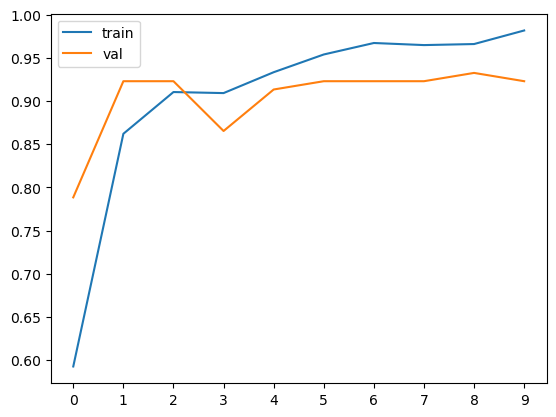

In [20]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.xticks(np.arange(10))
plt.legend()

## Hyper-parameter tuning

### Learning rate

In [21]:
def generate_model(learning_rate):
    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=(CONFIG.img_size, CONFIG.img_size, 3),
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(CONFIG.img_size, CONFIG.img_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [22]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:

    print(f"Learning rate: {lr}")

    model = generate_model(learning_rate=lr)
    history = model.fit(train_ds, validation_data=val_ds, epochs=CONFIG.epochs)
    scores[lr] = history.history
    print()

Learning rate: 0.0001
Epoch 1/10
26/26 [==============================] - 9s 265ms/step - loss: 2.0257 - accuracy: 0.2467 - val_loss: 1.6684 - val_accuracy: 0.4038
Epoch 2/10
26/26 [==============================] - 6s 243ms/step - loss: 1.5119 - accuracy: 0.3712 - val_loss: 1.3388 - val_accuracy: 0.4615
Epoch 3/10
26/26 [==============================] - 6s 245ms/step - loss: 1.2714 - accuracy: 0.5139 - val_loss: 1.1837 - val_accuracy: 0.5769
Epoch 4/10
26/26 [==============================] - 6s 245ms/step - loss: 1.1461 - accuracy: 0.5985 - val_loss: 1.0903 - val_accuracy: 0.6154
Epoch 5/10
26/26 [==============================] - 6s 246ms/step - loss: 1.0631 - accuracy: 0.6578 - val_loss: 1.0221 - val_accuracy: 0.6731
Epoch 6/10
26/26 [==============================] - 6s 247ms/step - loss: 1.0001 - accuracy: 0.6844 - val_loss: 0.9674 - val_accuracy: 0.7212
Epoch 7/10
26/26 [==============================] - 6s 247ms/step - loss: 0.9487 - accuracy: 0.7158 - val_loss: 0.9214 - val_a

#### Train accuracy with learning rates

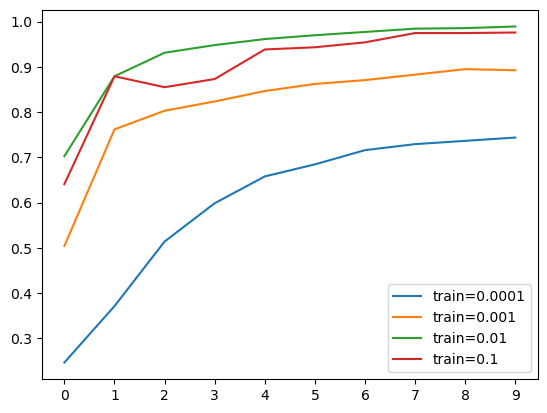

In [23]:
for lr, hist in scores.items():
    plt.plot(hist["accuracy"], label=("train=%s" % lr))

plt.xticks(np.arange(10))
plt.legend()

#### Validation accuracy with learning rates

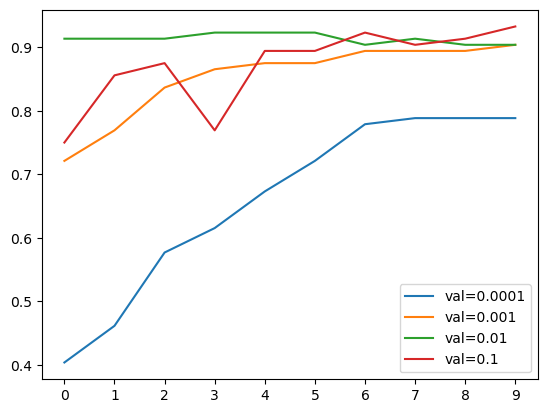

In [24]:
for lr, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=("val=%s" % lr))

plt.xticks(np.arange(10))
plt.legend()

## Adjusting configurations

In [25]:
config = CONFIG()
config.learning_rate = 0.01  # After fine tuned

## Checkpoint

In [26]:
# Checkpoint settings
def checkpoint_setup(file_name="xception_v1-{epoch:02d}-{val_loss:.2f}.h5"):
    version = file_name[9:11]
    checkpoint_filepath = os.path.join(config.workdir, version, "ckpt", file_name)
    checkpoint = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath, save_best_only=True, monitor="val_accuracy", mode="max"
    )
    return checkpoint

In [27]:
model = generate_model(learning_rate=config.learning_rate)

file_name = "xception_v1-epoch_{epoch:02d}-val_loss_{val_loss:.2f}.h5"
checkpoint = checkpoint_setup(file_name)

history = model.fit(train_ds, epochs=config.epochs, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/10
26/26 [==============================] - 9s 291ms/step - loss: 0.7578 - accuracy: 0.6941 - val_loss: 0.3147 - val_accuracy: 0.9135
Epoch 2/10
26/26 [==============================] - 7s 266ms/step - loss: 0.3430 - accuracy: 0.8658 - val_loss: 0.2516 - val_accuracy: 0.9231
Epoch 3/10
26/26 [==============================] - 7s 258ms/step - loss: 0.2158 - accuracy: 0.9250 - val_loss: 0.2296 - val_accuracy: 0.9038
Epoch 4/10
26/26 [==============================] - 7s 270ms/step - loss: 0.1763 - accuracy: 0.9589 - val_loss: 0.2099 - val_accuracy: 0.9327
Epoch 5/10
26/26 [==============================] - 7s 259ms/step - loss: 0.1601 - accuracy: 0.9468 - val_loss: 0.2039 - val_accuracy: 0.9231
Epoch 6/10
26/26 [==============================] - 7s 261ms/step - loss: 0.1243 - accuracy: 0.9722 - val_loss: 0.2015 - val_accuracy: 0.9231
Epoch 7/10
26/26 [==============================] - 7s 261ms/step - loss: 0.1092 - accuracy: 0.9782 - val_loss: 0.1996 - val_accuracy: 0.9327
Epoch 

## Adding more layers

In [28]:
def generate_model_add_inner(learning_rate, size_inner):

    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=(config.img_size, config.img_size, 3),
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(config.img_size, config.img_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    outputs = keras.layers.Dense(config.num_classes)(inner)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [29]:
scores = {}

for size in [10, 100, 1000]:

    print(f"Dense inner size: {size}")

    model = generate_model_add_inner(
        learning_rate=config.learning_rate, size_inner=size
    )
    history = model.fit(train_ds, validation_data=val_ds, epochs=config.epochs)
    scores[size] = history.history

    print()

Dense inner size: 10
Epoch 1/10
26/26 [==============================] - 10s 278ms/step - loss: 1.1741 - accuracy: 0.3192 - val_loss: 1.1024 - val_accuracy: 0.3077
Epoch 2/10
26/26 [==============================] - 7s 253ms/step - loss: 1.0997 - accuracy: 0.3144 - val_loss: 1.1009 - val_accuracy: 0.3077
Epoch 3/10
26/26 [==============================] - 7s 254ms/step - loss: 1.0994 - accuracy: 0.3216 - val_loss: 1.0996 - val_accuracy: 0.3077
Epoch 4/10
26/26 [==============================] - 7s 256ms/step - loss: 1.0995 - accuracy: 0.3096 - val_loss: 1.0994 - val_accuracy: 0.3077
Epoch 5/10
26/26 [==============================] - 7s 253ms/step - loss: 1.0993 - accuracy: 0.3253 - val_loss: 1.0990 - val_accuracy: 0.3077
Epoch 6/10
26/26 [==============================] - 7s 257ms/step - loss: 1.0993 - accuracy: 0.3192 - val_loss: 1.0993 - val_accuracy: 0.3077
Epoch 7/10
26/26 [==============================] - 7s 258ms/step - loss: 1.0992 - accuracy: 0.3180 - val_loss: 1.0993 - val_a

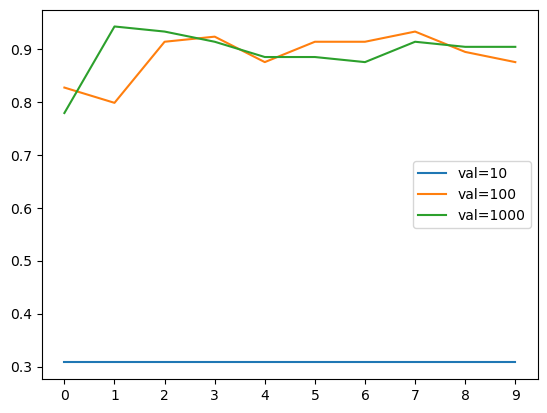

In [30]:
for size, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=("val=%s" % size))

plt.xticks(np.arange(10))
plt.legend()

In [31]:
# Adjust configurations
config.size_inner = 10

## Add Regularization and dropout

In [32]:
def generate_model_add_inner_dropout(learning_rate, size_inner, droprate):

    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=(config.img_size, config.img_size, 3),
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(config.img_size, config.img_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(config.num_classes)(drop)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [33]:
scores = {}

for droprate in [0.0, 0.2, 0.5]:
    print(f"Dropout rate : {droprate}")

    model = generate_model_add_inner_dropout(
        learning_rate=config.learning_rate,
        size_inner=config.size_inner,
        droprate=droprate,
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()

Dropout rate : 0.0
Epoch 1/30
26/26 [==============================] - 9s 277ms/step - loss: 1.0257 - accuracy: 0.5200 - val_loss: 0.7274 - val_accuracy: 0.7308
Epoch 2/30
26/26 [==============================] - 7s 254ms/step - loss: 0.5723 - accuracy: 0.7727 - val_loss: 0.3638 - val_accuracy: 0.8462
Epoch 3/30
26/26 [==============================] - 7s 254ms/step - loss: 0.3382 - accuracy: 0.8597 - val_loss: 0.2623 - val_accuracy: 0.9135
Epoch 4/30
26/26 [==============================] - 7s 257ms/step - loss: 0.2545 - accuracy: 0.9154 - val_loss: 0.2281 - val_accuracy: 0.9135
Epoch 5/30
26/26 [==============================] - 7s 258ms/step - loss: 0.1789 - accuracy: 0.9468 - val_loss: 0.2078 - val_accuracy: 0.9231
Epoch 6/30
26/26 [==============================] - 7s 258ms/step - loss: 0.1324 - accuracy: 0.9637 - val_loss: 0.2030 - val_accuracy: 0.9038
Epoch 7/30
26/26 [==============================] - 7s 258ms/step - loss: 0.1101 - accuracy: 0.9807 - val_loss: 0.2035 - val_accu

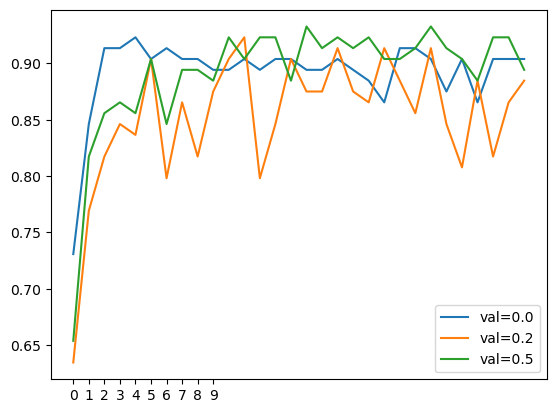

In [34]:
for droprate, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=("val=%s" % droprate))

plt.xticks(np.arange(10))
plt.legend()

In [43]:
# adjust dropout rate configuration
config.droprate = 0.2
config.epochs = 30

## Finalize model

In [44]:
def generate_final_model(learning_rate, size_inner, droprate):

    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=(config.img_size, config.img_size, 3),
    )

    base_model.trainable = False

    
    #########################################

    inputs = keras.Input(shape=(config.img_size, config.img_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(config.num_classes)(drop)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [45]:
model = generate_final_model(
    learning_rate=config.learning_rate,
    size_inner=config.size_inner,
    droprate=config.droprate,
)

file_name = "xception_v2-epoch_{epoch:02d}-val_loss_{val_loss:.2f}.h5"
checkpoint = checkpoint_setup(file_name)

history = model.fit(
    train_ds, validation_data=val_ds, epochs=config.epochs, callbacks=[checkpoint]
)

Epoch 1/30
26/26 [==============================] - 9s 284ms/step - loss: 0.8750 - accuracy: 0.5961 - val_loss: 0.5259 - val_accuracy: 0.8269
Epoch 2/30
26/26 [==============================] - 7s 259ms/step - loss: 0.5416 - accuracy: 0.7690 - val_loss: 0.4337 - val_accuracy: 0.9038
Epoch 3/30
26/26 [==============================] - 7s 250ms/step - loss: 0.4758 - accuracy: 0.8089 - val_loss: 0.4371 - val_accuracy: 0.8654
Epoch 4/30
26/26 [==============================] - 7s 262ms/step - loss: 0.3831 - accuracy: 0.8440 - val_loss: 0.3348 - val_accuracy: 0.9135
Epoch 5/30
26/26 [==============================] - 7s 254ms/step - loss: 0.3380 - accuracy: 0.8718 - val_loss: 0.2429 - val_accuracy: 0.9135
Epoch 6/30
26/26 [==============================] - 7s 255ms/step - loss: 0.3065 - accuracy: 0.8718 - val_loss: 0.2822 - val_accuracy: 0.9135
Epoch 7/30
26/26 [==============================] - 7s 267ms/step - loss: 0.2346 - accuracy: 0.9069 - val_loss: 0.2288 - val_accuracy: 0.9231
Epoch 

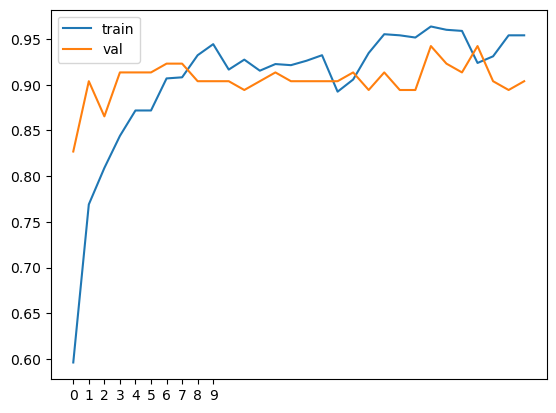

In [47]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.xticks(np.arange(10))
plt.legend()

## Augmentation

In [49]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1, 2, 1)
    plt.title("Original image")
    plt.imshow(original)

    plt.subplot(1, 2, 2)
    plt.title("Augmented image")
    plt.imshow(augmented)

### Stateless random crop

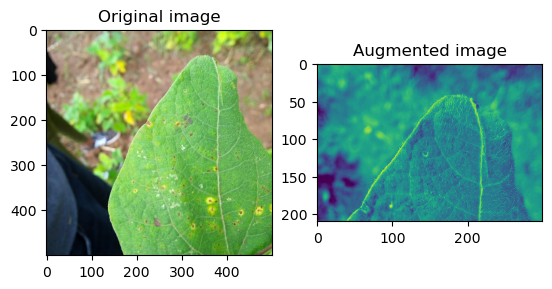

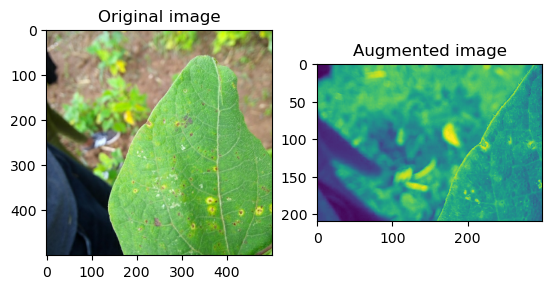

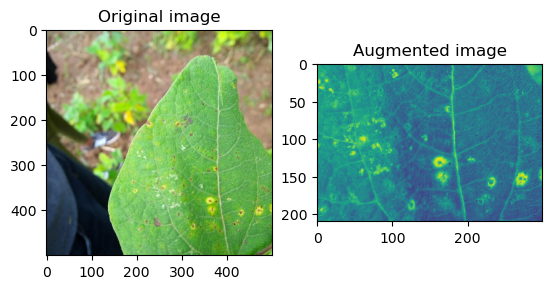

In [74]:
for i in range(3):
    seed = (i, 0)  # tuple of size (2,)
    stateless_random_crop = tf.image.stateless_random_crop(
        images[0], size=[210, 300, 1], seed=seed
    )
    visualize(images[0], stateless_random_crop)

### Stateless random flip up/down

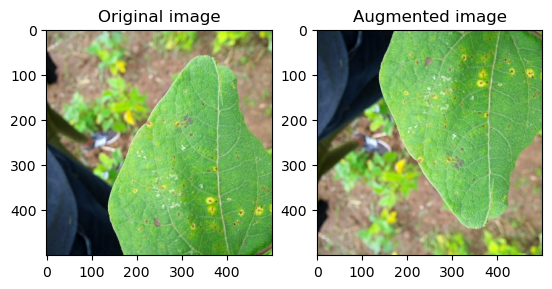

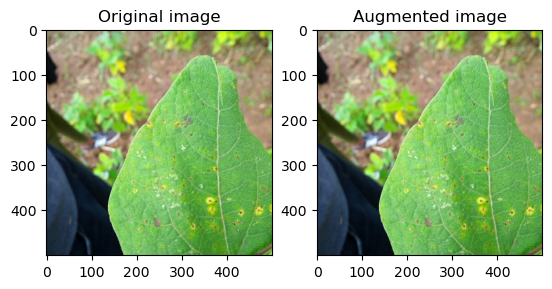

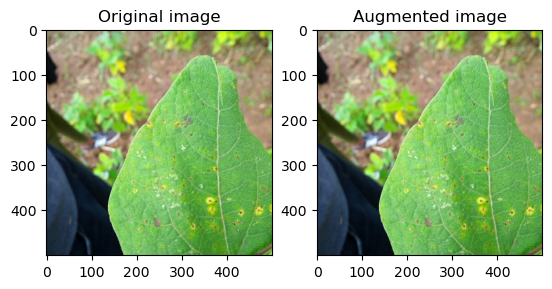

In [51]:
for i in range(3):
    seed = (i, 0)  # tuple of size (2,)
    stateless_random_crop = tf.image.stateless_random_flip_up_down(images[0], seed=seed)
    visualize(images[0], stateless_random_crop)

### Stateless random flip left/right

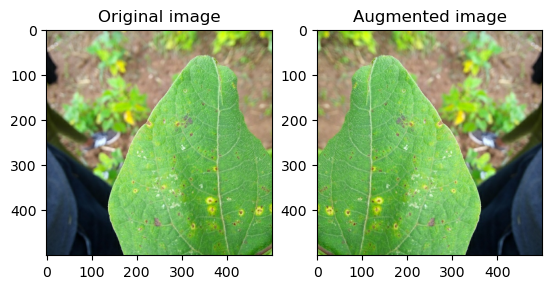

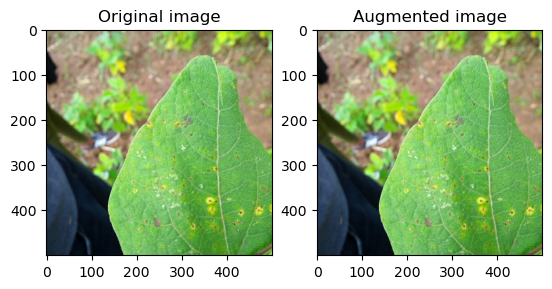

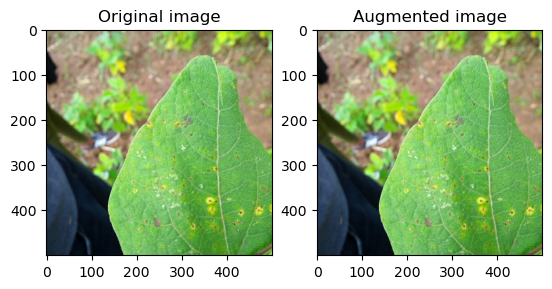

In [52]:
for i in range(3):
    seed = (i, 0)  # tuple of size (2,)
    stateless_random_crop = tf.image.stateless_random_flip_left_right(
        images[0], seed=seed
    )
    visualize(images[0], stateless_random_crop)

### Stateless random brightness

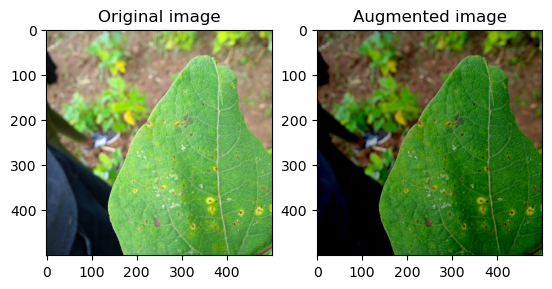

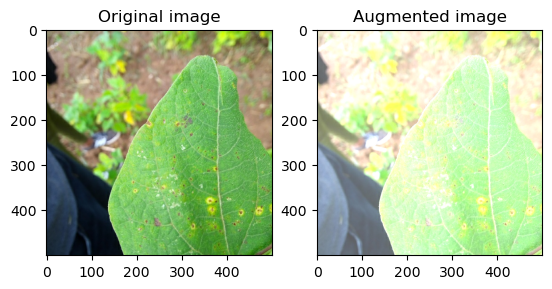

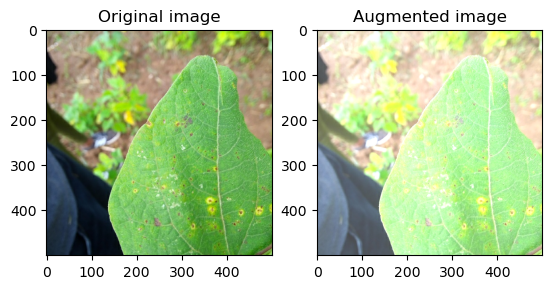

In [53]:
for i in range(3):
    seed = (i, 0)  # tuple of size (2,)
    stateless_random_crop = tf.image.stateless_random_brightness(
        images[0], max_delta=0.5, seed=seed
    )
    visualize(images[0], stateless_random_crop)

### Resize with crop or pad

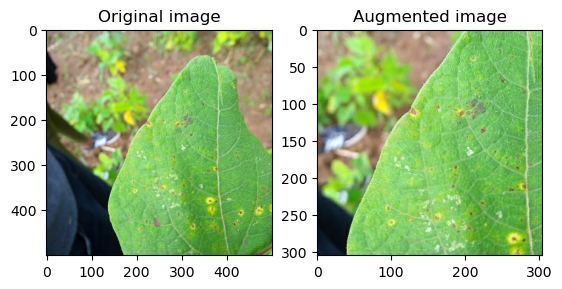

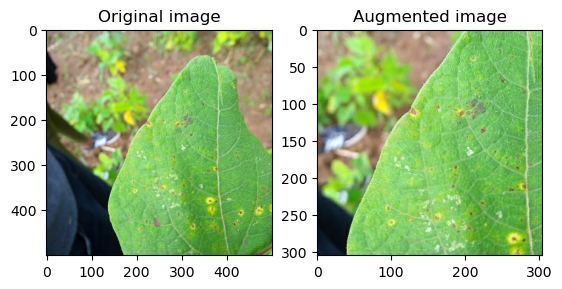

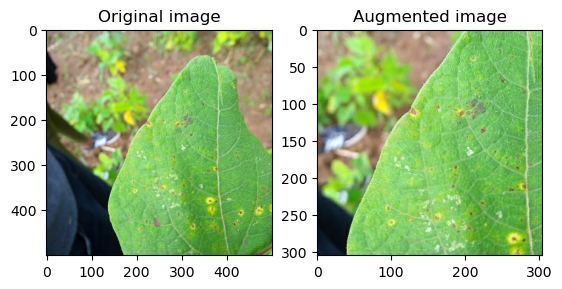

In [54]:
for i in range(3):
    seed = (i, 0)  # tuple of size (2,)
    stateless_random_crop = tf.image.resize_with_crop_or_pad(
        images[0], config.img_size + 6, config.img_size + 6
    )
    visualize(images[0], stateless_random_crop)

## Preprocessing dataset

In [145]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    "beans",
    split=["train[:80%]", "train[80%:90%]", "train[90%:]"],
    #     batch_size=CONFIG.batch_size,
    with_info=True,
    as_supervised=True,
    data_dir="../dataset",
)
check_instance(train_ds)
check_instance(val_ds)
check_instance(test_ds)

<PrefetchDataset shapes: ((500, 500, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((500, 500, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((500, 500, 3), ()), types: (tf.uint8, tf.int64)>


In [146]:
def prepare_ds(ds, seed=config.seed, shuffle=False):
    
    ds = ds.map(lambda x, y: (resize_and_rescale(x), y), num_parallel_calls=AUTOTUNE)
    
    if shuffle:
        ds = ds.shuffle(config.seed)
        
    # Batch all datasets
    ds = ds.batch(config.batch_size)

    # Use buffered prefetching on all datasets.
    return ds.prefetch(buffer_size=config.AUTOTUNE)

In [147]:
train_ds = prepare_ds(train_ds, shuffle=True)
val_ds = prepare_ds(val_ds)
test_ds = prepare_ds(test_ds)

In [151]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"), 
        keras.layers.RandomRotation(0.1),
        keras.layers.RandomCrop(150, 150, seed=config.seed)
    ]
)

In [152]:
def generate_final_model_aug(learning_rate, size_inner, droprate):

    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=(config.img_size, config.img_size, 3),
    )

    base_model.trainable = False

    
    #########################################

    inputs = keras.Input(shape=(config.img_size, config.img_size, 3))
    x = data_augmentation(inputs)
    base = base_model(x, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(config.num_classes)(drop)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

## Final model with hyper-parameters fine tuned and augmentation

In [153]:
model = generate_final_model(
    learning_rate=config.learning_rate,
    size_inner=config.size_inner,
    droprate=config.droprate,
)

file_name = "xception_v3-epoch_{epoch:02d}-val_loss_{val_loss:.2f}.h5"
checkpoint = checkpoint_setup(file_name)

history = model.fit(
    train_ds, validation_data=val_ds, epochs=config.epochs, callbacks=[checkpoint]
)

Epoch 1/30
26/26 [==============================] - 9s 283ms/step - loss: 1.0311 - accuracy: 0.5381 - val_loss: 0.8240 - val_accuracy: 0.7115
Epoch 2/30
26/26 [==============================] - 7s 260ms/step - loss: 0.8163 - accuracy: 0.6759 - val_loss: 0.7392 - val_accuracy: 0.7308
Epoch 3/30
26/26 [==============================] - 7s 262ms/step - loss: 0.6841 - accuracy: 0.7618 - val_loss: 0.5583 - val_accuracy: 0.8558
Epoch 4/30
26/26 [==============================] - 7s 263ms/step - loss: 0.5328 - accuracy: 0.8368 - val_loss: 0.3919 - val_accuracy: 0.9038
Epoch 5/30
26/26 [==============================] - 7s 252ms/step - loss: 0.4713 - accuracy: 0.8525 - val_loss: 0.4284 - val_accuracy: 0.8846
Epoch 6/30
26/26 [==============================] - 7s 253ms/step - loss: 0.3910 - accuracy: 0.8791 - val_loss: 0.3931 - val_accuracy: 0.8942
Epoch 7/30
26/26 [==============================] - 7s 254ms/step - loss: 0.4051 - accuracy: 0.8634 - val_loss: 0.3687 - val_accuracy: 0.8750
Epoch 

In [170]:
model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_38 (InputLayer)       [(None, 299, 299, 3)]     0         
                                                                 
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d_18  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_30 (Dense)            (None, 10)                20490     
                                                                 
 dropout_9 (Dropout)         (None, 10)                0         
                                                                 
 dense_31 (Dense)            (None, 3)                 33        
                                                          

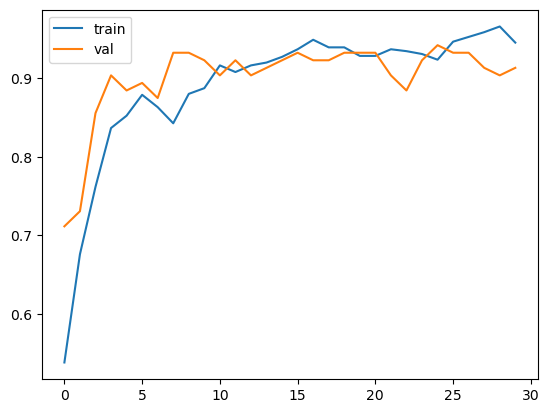

In [156]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
# plt.xticks(np.arange(30))
plt.legend()

## Save model

In [165]:
model.save('./models/xception_final_model.h5', save_format='h5')

## Load model

In [162]:
!ls

models	notebook.ipynb	workdir


In [166]:
model = keras.models.load_model('./models/xception_final_model.h5')

## Evaluate model

In [167]:
model.evaluate(test_ds)

4/4 [==============================] - 2s 297ms/step - loss: 0.4023 - accuracy: 0.8932


[0.4022789001464844, 0.893203854560852]

In [168]:
classes = [
    "angular_leaf_spot"
    "bean_rust"
    "healthy"
]

## Experiment with another Architecture

In [ ]:
def generate_model2():
    
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(299, 299, 3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),  
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(config.num_classes)
      ])

      model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])
        
    return model